In [1]:
#Import Libraries
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data set
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\preprodata\Preprocessed_dataset.csv')

In [3]:
#Prepare X and Y data set

x_data = df.drop(['type'],axis=1) # Features

y_data = df['type'] # Labels

In [4]:
#Splitting the data set into Train set & Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data,test_size = 0.3, random_state = 1) # 70% training and 30% test

In [5]:
#Make the Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train,y_train)

ypred = knn_clf.predict(X_test) #These are the predicted output values

In [6]:
#The scaler model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fitting and standardization
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [7]:
#To store rmse values for different k
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

rmse_val = []

#try running from k=1 through 20 and record testing accuracy
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    #fit the model
    model.fit(X_train, y_train) 

    #make prediction on test set
    pred=model.predict(X_test)

    #calculate rmse
    error = sqrt(mean_squared_error(y_test,pred)) 

    #store rmse values
    rmse_val.append(error) 
    print('RMSE value for k = ' , K , 'is :', error)

RMSE value for k =  1 is : 0.70116042296274
RMSE value for k =  2 is : 0.6705493484126087
RMSE value for k =  3 is : 0.6725216726570044
RMSE value for k =  4 is : 0.6830230727729186
RMSE value for k =  5 is : 0.693183265590593
RMSE value for k =  6 is : 0.7033788392462844
RMSE value for k =  7 is : 0.7145517444755299
RMSE value for k =  8 is : 0.723491093627359
RMSE value for k =  9 is : 0.7340773871075885
RMSE value for k =  10 is : 0.7437407184550247
RMSE value for k =  11 is : 0.7525444023740275
RMSE value for k =  12 is : 0.7601647033070913
RMSE value for k =  13 is : 0.7678905083180418
RMSE value for k =  14 is : 0.7744802016438693
RMSE value for k =  15 is : 0.7808682571535351
RMSE value for k =  16 is : 0.7870023061559621
RMSE value for k =  17 is : 0.7923742292879588
RMSE value for k =  18 is : 0.7971576445799783
RMSE value for k =  19 is : 0.8017194839450987
RMSE value for k =  20 is : 0.8069710304651668


In [8]:
#Training
#Create KNN Classifier: k=0.6636
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

#Prediction
y_pred = classifier.predict(X_test)

In [9]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 82.17010370723567


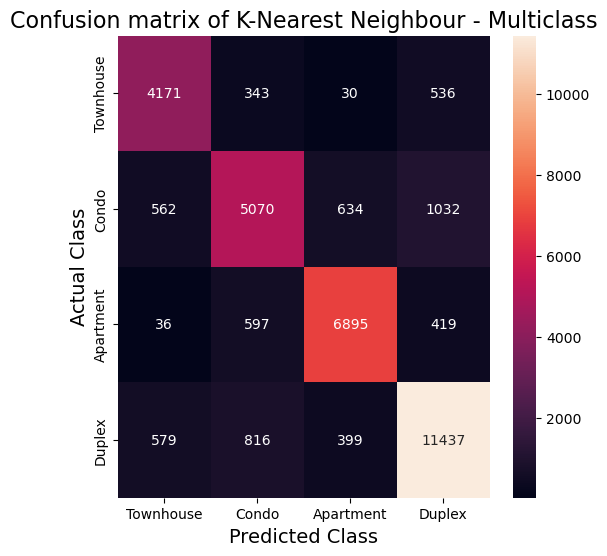

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import  confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

#Plot the Confusion Matrix
LABELS = ['Townhouse', 'Condo', 'Apartment', 'Duplex']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of K-Nearest Neighbour - Multiclass',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()